# Seeded watershed for membrane-based cell segmentation
In this section we will use a seeded watershed approach to cell segmentation. This approach is very common when cell segmentation based on images of membrane markers are given. Therefore, we use the napari plugin [napari-segment-blobs-and-things-with-membranes](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes). Under the hood, this plugins uses functions from [scikit-image](http://scikit-image.org/).

See also
* [Robert Haase's lecture 02a Image Filtering and Segmentation, watershed explanation at 35:30](https://youtu.be/LT8L3vSLQ2Q?t=2124)

In [1]:
from napari_segment_blobs_and_things_with_membranes import voronoi_otsu_labeling, \
                                                           seeded_watershed, \
                                                           local_minima_seeded_watershed
from skimage.io import imread
from skimage.filters import gaussian
from skimage import data
from pyclesperanto_prototype import imshow

We load the Cells3d example image from scikit-image which is a two-channel image showing nuclei and membrains.

In [2]:
cells = data.cells3d()
cells.shape

(60, 2, 256, 256)

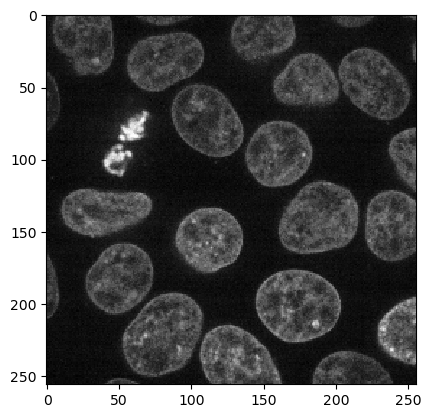

In [3]:
nuclei_channel = cells[30, 1]

imshow(nuclei_channel)

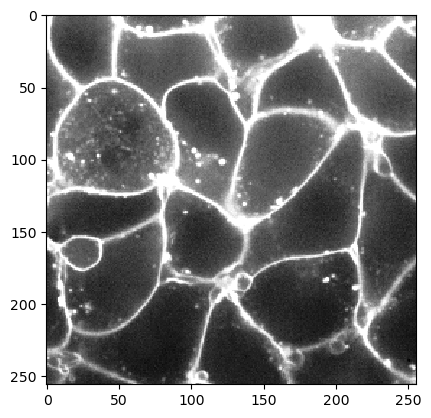

In [4]:
membrane_channel = cells[30, 0]

imshow(membrane_channel, max_display_intensity=6000)

## Voronoi-Otsu-Labeling for nuclei segmentation
First, we start with segmenting the nuclei using the [Voronoi-Otsu-Labeling algorithm](image-segmentation:voronoi-otsu-labeling).

StackViewNDArray([[0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  [0, 0, 0, ..., 5, 5, 5],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]])
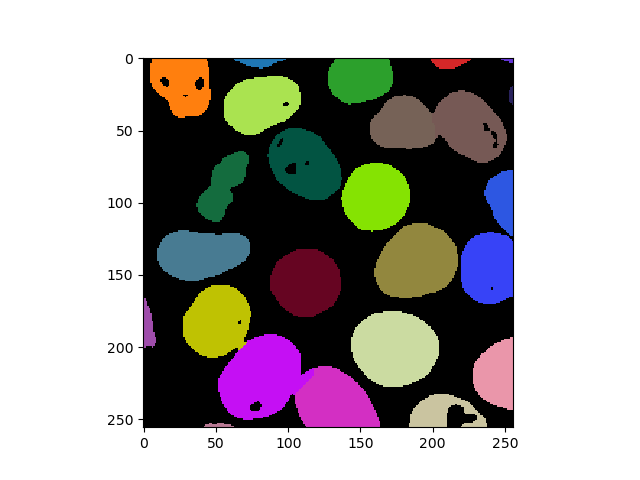

In [5]:
labeled_nuclei = voronoi_otsu_labeling(nuclei_channel, spot_sigma=10, outline_sigma=2)
labeled_nuclei

## Seeded watershed
We can use the image of labeled nuclei as starting point for flooding the low-intensity areas in the membrane image. This allows us to determine a cell segmentation.

StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25]])
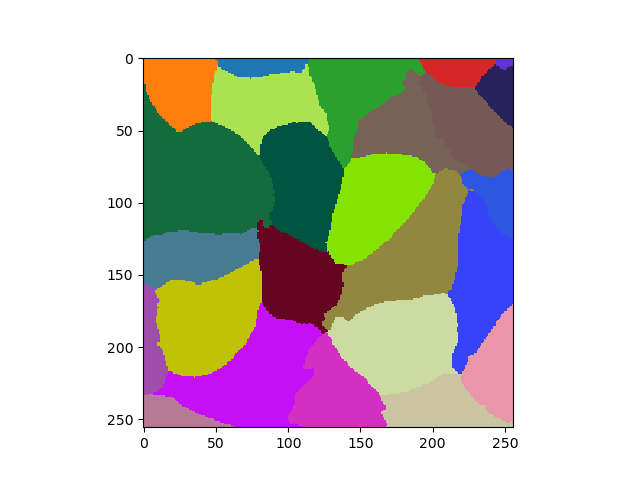

In [6]:
labeled_cells = seeded_watershed(membrane_channel, labeled_nuclei)
labeled_cells

If the outlines of the cells are not 100% accurate, it may make sense to blur the membrane image a bit before segmenting the cells.

StackViewNDArray([[ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  [ 1,  1,  1, ...,  5,  5,  5],
                  ...,
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25],
                  [24, 24, 24, ..., 25, 25, 25]])
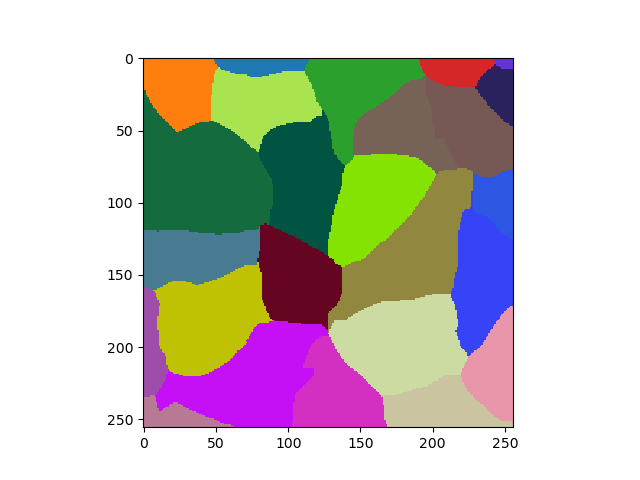

In [7]:
blurred = gaussian(membrane_channel, sigma=3)

labeled_cells = seeded_watershed(blurred, labeled_nuclei)
labeled_cells

## Seeded watershed using automatic seed detection

In case we didn't image a separate nuclei channel and only have the membrane channel available for segmentation, we can use the membrane image to search for local minima (dark areas).

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
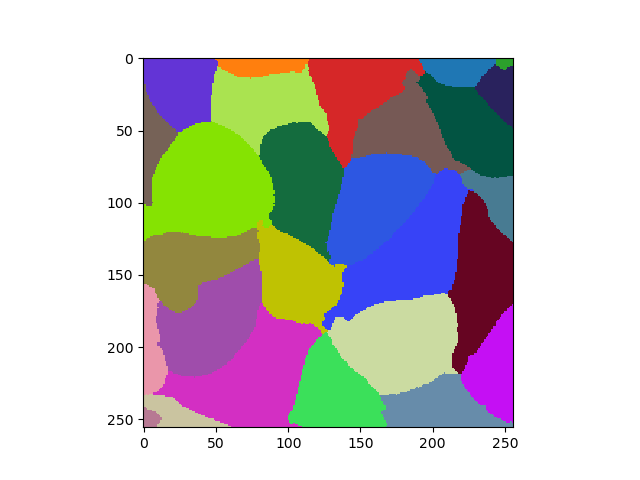

In [8]:
labeles_cells2 = local_minima_seeded_watershed(membrane_channel)
labeles_cells2

This function also has some parameters to allow fine tuning the segmentation. The parameter `outline_sigma` allows to control a Gaussian blur filter that allows fine-tuning the outlines of the segmented cells as shown above.

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27],
                  [24, 24, 24, ..., 27, 27, 27]])
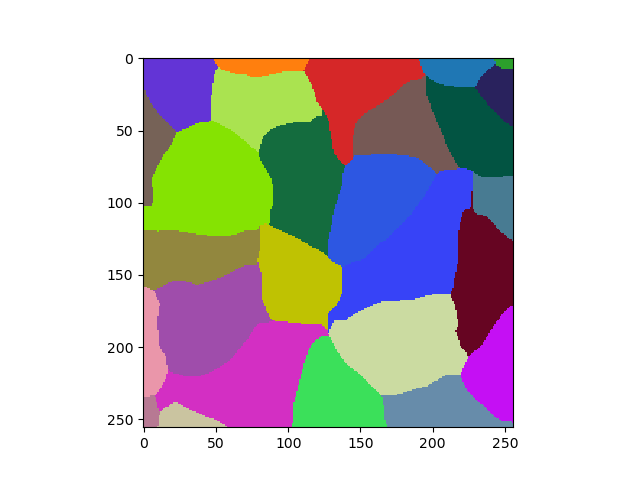

In [9]:
labeles_cells3 = local_minima_seeded_watershed(
                      membrane_channel, 
                      outline_sigma=3)
labeles_cells3

If there are multiple cells sticking together, it may make sense to specify `spot_sigma`. This parameter allows to configure how close / large cells are.

StackViewNDArray([[ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  [ 5,  5,  5, ...,  3,  3,  3],
                  ...,
                  [26, 26, 26, ..., 28, 28, 28],
                  [26, 26, 26, ..., 28, 28, 28],
                  [26, 26, 26, ..., 28, 28, 28]])
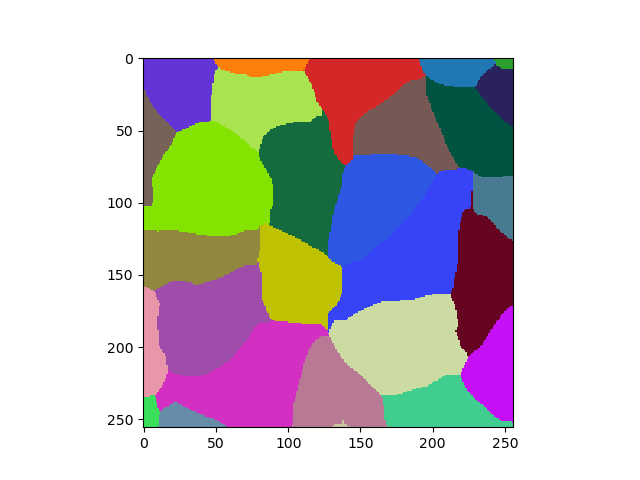

In [10]:
labeles_cells4 = local_minima_seeded_watershed(
                       membrane_channel, 
                       spot_sigma=9, 
                       outline_sigma=3)
labeles_cells4

## Exercise
Load the following dataset and find good parameters for processing it using a seeded watershed approach. This example image data is a courtesy of Sascha M. Kuhn, Nadler Lab, MPI-CBG Dresden.

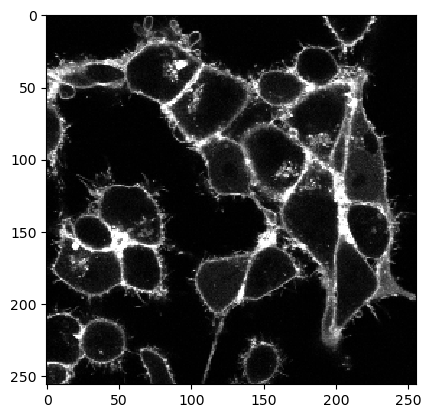

In [11]:
image_slice = imread("../../data/membrane_2d_timelapse.tif")[2]

imshow(image_slice)